In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df =pd.read_csv("transaction_new.csv")

In [11]:
df.info()
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%y')
df['Year'] = df['Date'].dt.year
df['Month']= df['Date'].dt.month
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Transaction_ID                647 non-null    object        
 1   Date                          647 non-null    datetime64[ns]
 2   Time                          647 non-null    object        
 3   Merchant_ID                   647 non-null    object        
 4   Customer_ID                   647 non-null    object        
 5   Device_ID                     647 non-null    object        
 6   Transaction_Type              647 non-null    object        
 7   Payment_Gateway               647 non-null    object        
 8   Transaction_City              647 non-null    object        
 9   Transaction_State             647 non-null    object        
 10  IP_Address                    647 non-null    object        
 11  Transaction_Status            64

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

In [33]:
df.head()
# fraud.shape


,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,...,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,T00022452,2023-04-20,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,...,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4
1,T00032233,2023-08-08,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,...,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8
2,T00037364,2023-06-25,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,...,Android,2,Utilities,Online,44.19,22,106.69,1,2023,6
3,T00015924,2024-01-28,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,...,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,1
4,T00021805,2023-06-21,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,...,MacOS,1,Other,Online,12.38,25,374.89,1,2023,6


In [13]:
# Define X and y
X = df.drop(columns=['fraud', 'Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID', 'IP_Address'])
y = df['fraud'].astype(int)  # ensure target is numeric

# Convert categorical columns to numeric (one-hot encode)

print(X)

          Date         Time Transaction_Type Payment_Gateway Transaction_City  \
0   2023-04-20   4:50:22 AM           Refund       SamplePay         Durgapur   
1   2023-08-08   8:09:21 AM    Bank Transfer       SamplePay  Rajpur Sonarpur   
2   2023-06-25   7:49:01 AM    Bank Transfer           Other        New Delhi   
3   2024-01-28   5:44:12 AM     Subscription         UPI Pay        Bharatpur   
4   2023-06-21   9:40:59 AM       Investment      Dummy Bank            Sagar   
..         ...          ...              ...             ...              ...   
642 2023-07-24   3:12:04 AM     Bill Payment      Gamma Bank        Hyderabad   
643 2023-07-05   6:21:18 AM         Purchase           Other        Bangalore   
644 2023-04-16   8:32:41 AM     Bill Payment           Other           Mumbai   
645 2023-10-28   9:33:42 AM    Bank Transfer    Bank of Data       Vijayawada   
646 2024-04-11  10:48:14 AM    Bank Transfer      Dummy Bank     Ichalkaranji   

     Transaction_State Tran

In [15]:
# Augment with noise
def augment_data(X, y, n_copies=4, noise_level=0.01):
    augmented_X = [X]
    augmented_y = [y]
    for _ in range(n_copies):
        noisy = X.copy()
        for col in noisy.select_dtypes(include=[np.number]).columns:
            noise = np.random.normal(0, noise_level * noisy[col].std(), len(noisy))
            noisy[col] += noise
        augmented_X.append(noisy)
        augmented_y.append(y.copy())
    return pd.concat(augmented_X), pd.concat(augmented_y)

X_aug, y_aug = augment_data(X, y, n_copies=4)
# Just to be 100% sure, drop any lingering non-numeric columns
X_aug = X_aug.select_dtypes(include=[np.number])

# Apply SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_final, y_final = smote.fit_resample(X_aug, y_aug)

print("✅ Final dataset shape:", X_final.shape)


✅ Final dataset shape: (4920, 6)


In [34]:
# Combine features and target into one DataFrame
df_final = X_final.copy()
df_final['fraud'] = y_final  # or whatever your target column is

# View first few rows
print(df_final)

df_final.isnull().sum()


      Transaction_Frequency  Transaction_Amount_Deviation  \
0                  1.000000                     25.020000   
1                 30.000000                    -36.640000   
2                  2.000000                     44.190000   
3                  0.000000                    -54.340000   
4                  1.000000                     12.380000   
...                     ...                           ...   
4915               1.919044                    -64.284820   
4916               1.897918                    -83.955767   
4917               2.610060                     -9.263001   
4918               2.059354                    -39.785741   
4919               3.060969                     53.285378   

      Days_Since_Last_Transaction       amount         Year      Month  fraud  
0                        5.000000   396.620000  2023.000000   4.000000      1  
1                       20.000000   121.940000  2023.000000   8.000000      1  
2                       22.

Transaction_Frequency           0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
Year                            0
Month                           0
fraud                           0
dtype: int64

In [30]:

normal = df_final[df_final['fraud'] == 0]
fraud = df_final[df_final['fraud'] == 1]

In [31]:
print(normal.shape)
print(fraud.shape)


(2460, 7)
(2460, 7)


In [24]:
from collections import Counter

print("Before SMOTE:", Counter(y_aug))  # or y if not augmented yet
print("After SMOTE :", Counter(y_final))


Before SMOTE: Counter({0: 2460, 1: 775})
After SMOTE : Counter({1: 2460, 0: 2460})


In [39]:
# Remember, after SMOTE, your data is in X_final and y_final

# from collections import Counter

# # Check the new counts
# print(Counter(y_final))

# # To check just frauds (class 1)
# fraud_count = sum(y_final == 1)
# print("Number of fraud transactions after SMOTE:", fraud_count)

print(y_final)

0       1
1       1
2       1
3       1
4       1
       ..
4915    1
4916    1
4917    1
4918    1
4919    1
Name: fraud, Length: 4920, dtype: int64


In [36]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
# Perform scaling
def preprocess_data(X_final):
# Initialize StandardScaler
    scaler = StandardScaler()
    # Scale the features
    X_scaled = scaler.fit_transform(X_final) 
    return X_scaled
# Splitting the dataset into features (X) and target variable (y)
X_final = df_final.drop('fraud', axis=1)
y_final = df_final['fraud']
# Preprocess the features
X_scaled = preprocess_data(X_final)
# Split the preprocessed data into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_final, test_size=0.2,random_state=42)
# Print the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (3936, 6)
Test features shape: (984, 6)
Training target shape: (3936,)
Test target shape: (984,)


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)

print(X_train.shape)
print(X_test.shape)


(3936, 6)
(984, 6)


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier # Import XGBoost classifier

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2,random_state=42, stratify=y)

def evaluate_model(model, X_test, y_test): # Calculate predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    return {
    'Model': type(model).__name__, 
    'Accuracy': accuracy, 
    'Precision': precision, 
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC Score': roc_auc
    }
# Define models without Support Vector Machine (SVM)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(), # Added XGBoost to the dictionary
}
# List to store evaluation results
results = []
# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train) # Assuming X_train, y_train are defined metrics = evaluate_model(model, X_test, y_test) # Assuming X_test, y_test␣
    # are defined results.append(metrics)
# Create a DataFrame from the results
df_results = pd.DataFrame(results)
# Display the DataFrame
df_results

ValueError: Found input variables with inconsistent numbers of samples: [4920, 647]

In [40]:
print(X_final.shape)
print(y_final.shape)


(4920, 6)
(4920,)


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

# Define evaluation function
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Train
    metrics = evaluate_model(model, X_test, y_test)  # Evaluate
    results.append(metrics)  # Store the results

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)


Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:
                        Model  Accuracy  Precision    Recall  F1 Score  \
0      DecisionTreeClassifier  0.981707   0.977823  0.985772  0.981781   
1      RandomForestClassifier  0.993902   0.995918  0.991870  0.993890   
2  GradientBoostingClassifier  0.962398   0.976939  0.947154  0.961816   
3               XGBClassifier  0.998984   1.000000  0.997967  0.998983   

   ROC AUC Score  
0       0.981707  
1       0.993902  
2       0.962398  
3       0.998984  


In [43]:
# Import XGBClassifier from xgboost
from xgboost import XGBClassifier
# Initialize and train the XGBoost classifier on the entire dataset
XGBoost_model = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
XGBoost_model.fit(X_final, y_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

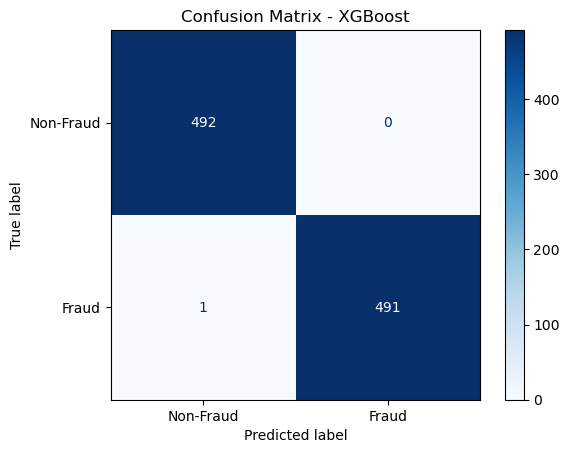

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the best model
y_pred = models["XGBoost"].predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [46]:
import joblib
joblib.dump(XGBoost_model, 'xgboost_model.pkl')
model = joblib.load('xgboost_model.pkl')

